In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [79]:


df = pd.read_csv('/content/Mall_Customers_Segmentation.csv')
print(df)

     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


In [80]:
df.isnull().sum().sum ()

df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [81]:
col=list(df.columns)
print(col)

['CustomerID', 'Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']


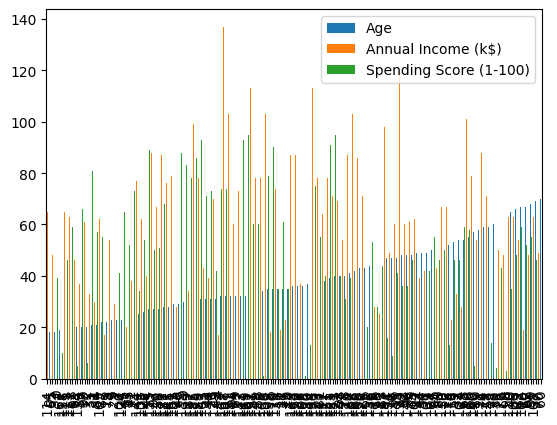

      Genre  Age  Annual Income (k$)  Spending Score (1-100)
114  Female   18                  65                      48
91     Male   18                  59                      41
65     Male   18                  48                      59
33     Male   18                  33                      92
0      Male   19                  15                      39
..      ...  ...                 ...                     ...
90   Female   68                  59                      55
108    Male   68                  63                      43
57     Male   69                  44                      46
70     Male   70                  49                      55
60     Male   70                  46                      56

[200 rows x 4 columns]


In [82]:
age = df.sort_values(by="Age")
age.pop('CustomerID')
age.plot(kind = 'bar')

plt.axis()
plt.show()

print(age)

<Axes: >

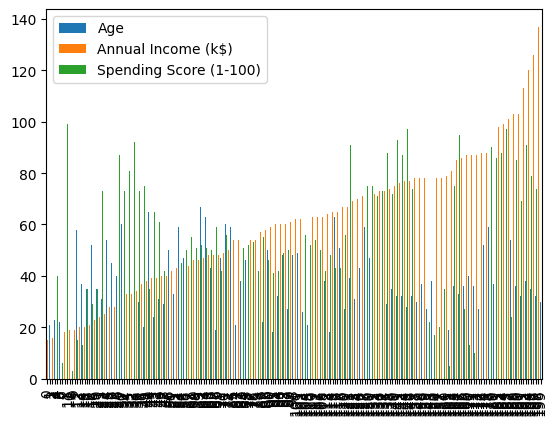

In [83]:
p = df.sort_values(by="Annual Income (k$)")
p.pop('CustomerID')
p.plot(kind = 'bar')



<Axes: >

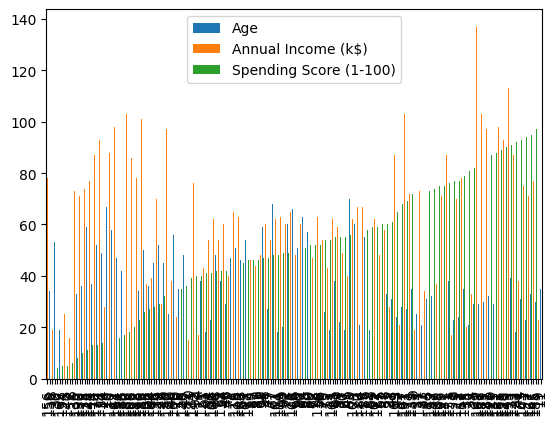

In [84]:
p = df.sort_values(by="Spending Score (1-100)")
p.pop('CustomerID')
p.plot(kind = 'bar')

In [85]:
df['Genre']= pd.factorize(df['Genre'])[ 0 ]

In [86]:
corrMatrix = df.corr()
print(corrMatrix)

                        CustomerID     Genre       Age  Annual Income (k$)  \
CustomerID                1.000000 -0.057400 -0.026763            0.977548   
Genre                    -0.057400  1.000000 -0.060867           -0.056410   
Age                      -0.026763 -0.060867  1.000000           -0.012398   
Annual Income (k$)        0.977548 -0.056410 -0.012398            1.000000   
Spending Score (1-100)    0.013835  0.058109 -0.327227            0.009903   

                        Spending Score (1-100)  
CustomerID                            0.013835  
Genre                                 0.058109  
Age                                  -0.327227  
Annual Income (k$)                    0.009903  
Spending Score (1-100)                1.000000  


In [87]:

df_norm = (df-df.min())/(df.max()-df.min())
print(df_norm)

     CustomerID  Genre       Age  Annual Income (k$)  Spending Score (1-100)
0      0.000000    0.0  0.019231            0.000000                0.387755
1      0.005025    0.0  0.057692            0.000000                0.816327
2      0.010050    1.0  0.038462            0.008197                0.051020
3      0.015075    1.0  0.096154            0.008197                0.775510
4      0.020101    1.0  0.250000            0.016393                0.397959
..          ...    ...       ...                 ...                     ...
195    0.979899    1.0  0.326923            0.860656                0.795918
196    0.984925    1.0  0.519231            0.909836                0.275510
197    0.989950    0.0  0.269231            0.909836                0.744898
198    0.994975    0.0  0.269231            1.000000                0.173469
199    1.000000    0.0  0.230769            1.000000                0.836735

[200 rows x 5 columns]


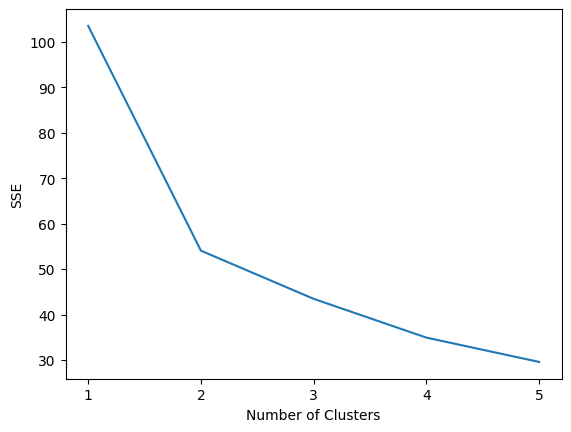

In [88]:



#initialize kmeans parameters
kmeans_kwargs = {
"init": "random",
"n_init": 5,
"random_state": 1,
}

#create list to hold SSE values for each k
sse = []
for k in range(1, 6):
 kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
 kmeans.fit(df_norm)
 sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 6), sse)
plt.xticks(range(1, 6))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()


In [89]:
#instantiate the k-means class, using optimal number of clusters
kmeans = KMeans(init="random", n_clusters=2, n_init=10, random_state=1)

#fit k-means algorithm to data
kmeans.fit(df_norm)

#view cluster assignments for each observation
kmeans.labels_

df['cluster'] = kmeans.labels_

In [95]:
clus1=df[df['cluster'] == 0]
clus2=df[df['cluster'] == 1]
#,'cluster','genre'
clus1.pop('CustomerID')
clus1.pop('cluster')
clus1.pop('Genre')
clus2.pop('CustomerID')
clus2.pop('cluster')
clus2.pop('Genre')


0      0
1      0
8      0
10     0
14     0
      ..
187    0
192    0
197    0
198    0
199    0
Name: Genre, Length: 88, dtype: int64

<Axes: >

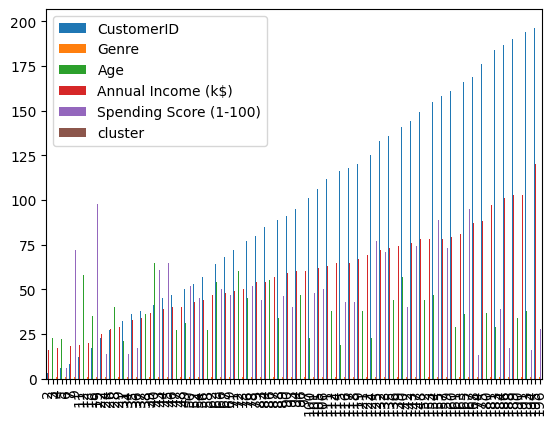

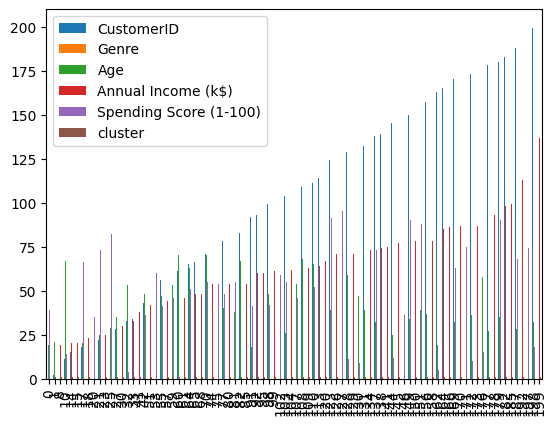

In [91]:
clus1.plot(kind = 'bar')
clus2.plot(kind = 'bar')